In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("~/Desktop/machines.csv")

In [23]:
df.head()

,week,machines
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [24]:
MACHINE_COST=250000
MACHINE_SALVAGE = 100000
MACHINE_CAPACITY=25000
REJECT_COST=1
PRICE=2

In [25]:
df['balance'] = ""
df.iloc[0,df.columns.get_loc('balance')] = 10000

In [26]:
df.head()

,week,machines,balance
0,0,1,10000
1,1,1,
2,2,1,
3,3,1,
4,4,1,


In [27]:
def ProductionRun(df):
    previous_machines=df.iloc[0,df.columns.get_loc('machines')]
    previous_balance=df.iloc[0,df.columns.get_loc('balance')]
    for index, row in df.iterrows():
        costs = (row['machines'] - previous_machines)*MACHINE_COST
        capacity = row['machines']*MACHINE_CAPACITY  
        orders = (1000+np.random.uniform(0,2000))*row['week']
        if orders > capacity:
            costs = costs + (orders-capacity)*REJECT_COST
            revenue = capacity * PRICE
        else:
            revenue = orders * PRICE
        balance = previous_balance+revenue-costs
        df.iloc[index, df.columns.get_loc('balance')] = balance
        previous_balance = balance
        previous_machines = row['machines']
        if balance < 0:
            break

    if previous_balance>0:
        salvage = previous_machines*MACHINE_SALVAGE
        return (previous_balance + salvage)
    else:
        return 0
        

In [33]:
# here we will go through just one iteration of the model

final_balance = ProductionRun(df)
if final_balance == 0:
    print("you went bankrupt")
else:
    print("Final balance:  ${:0,.0f}".format(final_balance))

Final balance:  $3,133,695


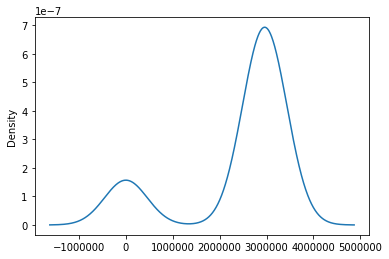

In [36]:
# now let's go through the model many times and draw a distribution
# of the outcomes

results=[]
i = 0

while i < 100:
    results.append(ProductionRun(df))
    i = i + 1

s = pd.Series(results)
s.plot.kde()